<a href="https://colab.research.google.com/github/rtwkrjj/basic-calculator-cpp/blob/main/Python_Task02_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Step 1: Uploadding my sample csv file
from google.colab import files
uploaded = files.upload()  # here I am uploading the files manually to google colab, as this takes uploaded file in colab

import pandas as pd #important hai
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors # for report decoration with colors
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet
import os

# Step 2: Read uploaded file

filename = next(iter(uploaded))  # Get the uploaded file name
df = pd.read_csv(filename)

# Step 3: Analyzing the data

summary = df.groupby("Department")["Salary"].agg(['count', 'mean', 'min', 'max']).reset_index()
summary.columns = ['Department', 'Employees', 'Average Salary', 'Min Salary', 'Max Salary']

# Step 4: Generating the  PDF report

pdf_filename = filename.replace('.csv', '_report.pdf')  # changing the file name to pdf(here report.pdf)

doc = SimpleDocTemplate(pdf_filename, pagesize=A4)
elements = []
styles = getSampleStyleSheet()

elements.append(Paragraph("Employee Salary Report ", styles['Title']))
elements.append(Spacer(1, 12))
elements.append(Paragraph("This report summarizes the salary distribution by department.", styles['Normal']))
elements.append(Spacer(1, 12))

data = [summary.columns.to_list()] + summary.values.tolist()
table = Table(data)

 # managing table styles, using tablestyle library functions

table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.lightskyblue),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.pink),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
]))

elements.append(table)
doc.build(elements)
print(f"✅ PDF report has been generated: {pdf_filename}")

# Step 5: Download PDF

files.download(pdf_filename) # automatic download report pdf to os


Saving employees.csv to employees (2).csv
✅ PDF report has been generated: employees (2)_report.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# Upload CSV
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the file
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# Show first few rows
df.head()


Saving employees.csv to employees (3).csv


,Name,Department,Salary
0,Alice,Engineering,70000
1,Bob,Marketing,50000
2,Charlie,Engineering,80000
3,David,HR,45000
4,Eva,Marketing,52000


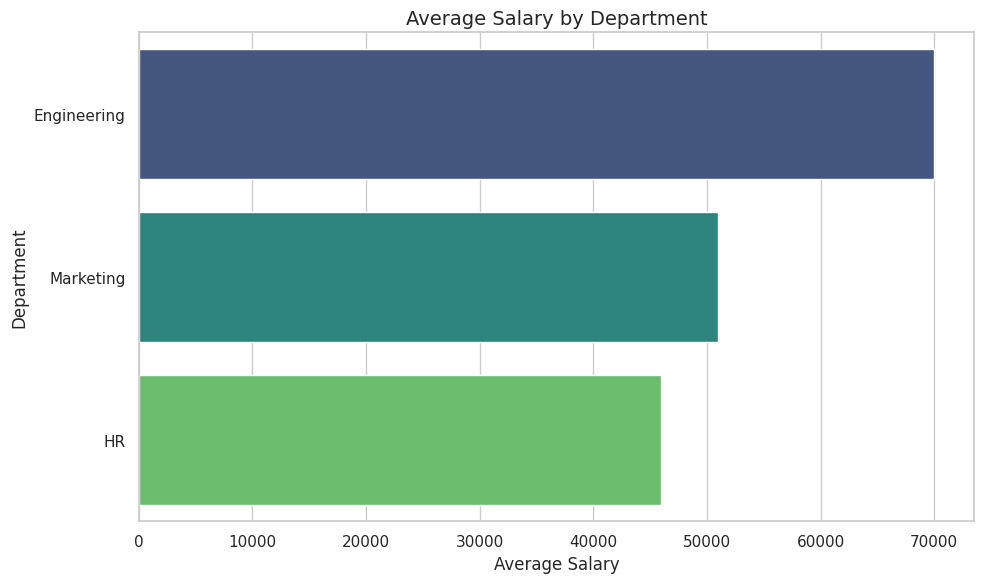

In [38]:
# Set style of background(black\white)
sns.set(style="whitegrid")

# Compute average salary

avg_salary = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='viridis')
plt.title("Average Salary by Department", fontsize=14)
plt.xlabel("Average Salary")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


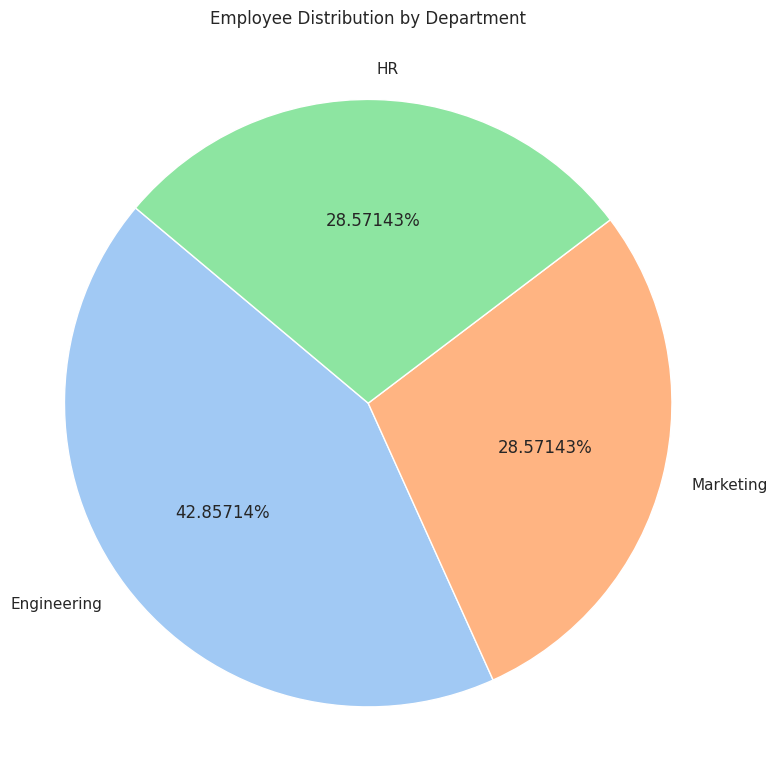

In [40]:
dept_counts = df['Department'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.5f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Employee Distribution by Department")
plt.axis('equal')  # Ensures it's a circle
plt.tight_layout()
plt.show()


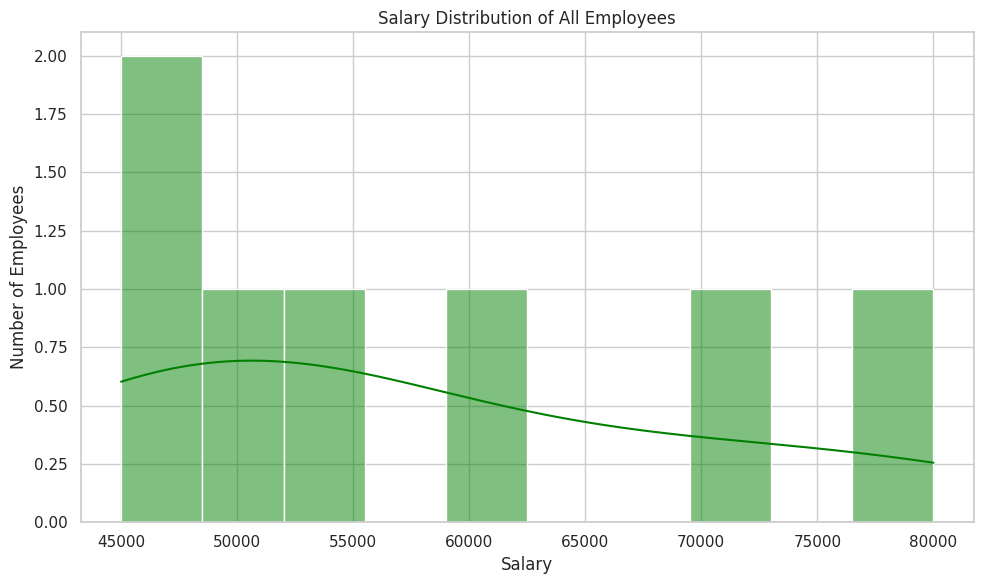

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=10, kde=True, color='green')
plt.title("Salary Distribution of All Employees") # adds a title
plt.xlabel("Salary") # labels the x coordinate
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()


In [45]:
if 'Age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Age', y='Salary', hue='Department', palette='husl')
    plt.title("Salary vs Age by Department")
    plt.xlabel("Age")
    plt.ylabel("Salary")
    plt.tight_layout()
    plt.show()
else:
    print("No 'Age' column found. Skipping scatter plot.")


No 'Age' column found. Skipping scatter plot.
